<a href="https://colab.research.google.com/github/buithanhdam/ProjectMachineLearning23/blob/dung/ProjectML23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and drive

In [2]:
#libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
# connect gg drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


Get dataset from gg drive


In [ ]:
#Mô tả dữ liệu
# Dữ liệu dataset Paramount+ Movies and Tv Shows
# Dữ liệu gồm có 3181 Mẫu
# mỗi mẫu dữ liệu gồm có 15 đặc trưng
# + id , tilte , type, description,	age_certification, release year,runtime, genres, production_countries, seasons, imdbid, imdb score, imdb votes, tmdb popularity, tmdb scores
# trong đó có 2 đặc trưng kiểu int64 Release year,runtime
# 5 đặc trưng kiểu float64 imdb_score , tmdb_popularity, tmdb_scores,seasons,imdb_votes
# 8 đặc trưng chứa dạng string: id , tilte , type, description,	age_certification,	age_certification (có 2 đặc trưng dạng mảng genres và production_countries )
# các mẫu dữ liệu còn thiếu các đặc trưng có dạng (null và NaN)
# Các vấn đề cần giải quyết xữ lý dữ liệu bị thiếu , loại bỏ  dặc trưng không cần thiết (missing )

In [4]:
df = pd.read_csv('paramount+.csv')
df.tail(15)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rate
3167,ts369971,Yoga Friends,SHOW,NOGGIN's Yoga Friends helps students practice ...,2022,NaN,1,['family'],[],1.0,tt22208486,NaN,NaN,NaN,NaN,normal
3168,tm875741,Funny Face,MOVIE,The destruction of his grandparents' home lead...,2021,NaN,95,"['crime', 'drama', 'romance', 'thriller']",['US'],NaN,tt11638942,5.2,579.0,NaN,NaN,normal
3169,ts373298,Pickled,SHOW,Sixteen celebrities compete in a pickleball to...,2022,NaN,88,[],[],1.0,NaN,NaN,NaN,NaN,NaN,normal
3170,ts324789,Nick News,SHOW,Nick News- is a platform TO INFORM AND INSPIRE...,2021,TV-G,24,[],[],3.0,tt16450828,NaN,NaN,NaN,NaN,normal
3171,tm1244765,Reclaiming History: Our Native Daughters,MOVIE,NaN,2021,NaN,44,['documentation'],[],NaN,tt21342466,NaN,NaN,NaN,NaN,normal
3172,ts291097,Disrupt & Dismantle with Soledad O'Brien,SHOW,NaN,2021,TV-MA,40,['documentation'],[],1.0,tt14315936,4.3,18.0,NaN,NaN,normal
3173,ts313367,Wolf Pack,SHOW,A teenage boy and girl get their lives changed...,2023,TV-MA,50,"['drama', 'fantasy', 'horror', 'scifi']",['US'],1.0,tt15487922,6.2,4183.0,267.800,8.206,normal
3174,ts378183,School Spirits,SHOW,"Maddie, a teen stuck in the afterlife investig...",2023,TV-MA,0,['drama'],['US'],1.0,tt21057450,NaN,NaN,33.040,9.000,normal
3175,tm1238886,Teen Wolf: The Movie,MOVIE,"The wolves are howling once again, as a terrif...",2023,R,140,"['action', 'fantasy', 'comedy', 'drama', 'roma...",['US'],NaN,tt15613268,5.6,10150.0,354.784,7.905,normal
3176,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,R,100,"['comedy', 'romance']","['US', 'MX']",NaN,tt14874302,5.5,864.0,21.746,5.729,normal


Generate data , data chart


In [ ]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,3182.000000,3182.000000,664.000000,2975.000000,2.972000e+03,3134.000000,2744.000000
mean,1993.174104,74.806411,3.977410,6.067160,2.525229e+04,13.443530,6.084723
std,30.639396,31.113905,5.264735,1.276696,1.003005e+05,44.952654,1.448689
min,1912.000000,0.000000,1.000000,1.400000,5.000000e+00,0.009442,1.000000
25%,1970.000000,50.000000,1.000000,5.300000,1.710000e+02,1.400000,5.200000
50%,2009.000000,81.000000,2.000000,6.100000,6.990000e+02,3.142500,6.100000
75%,2017.000000,95.000000,5.000000,7.000000,5.453500e+03,9.766500,7.000000
max,2023.000000,353.000000,50.000000,9.300000,1.870426e+06,1150.383000,10.000000


Text(0.5, 1.0, 'Distribution of Missing Values')

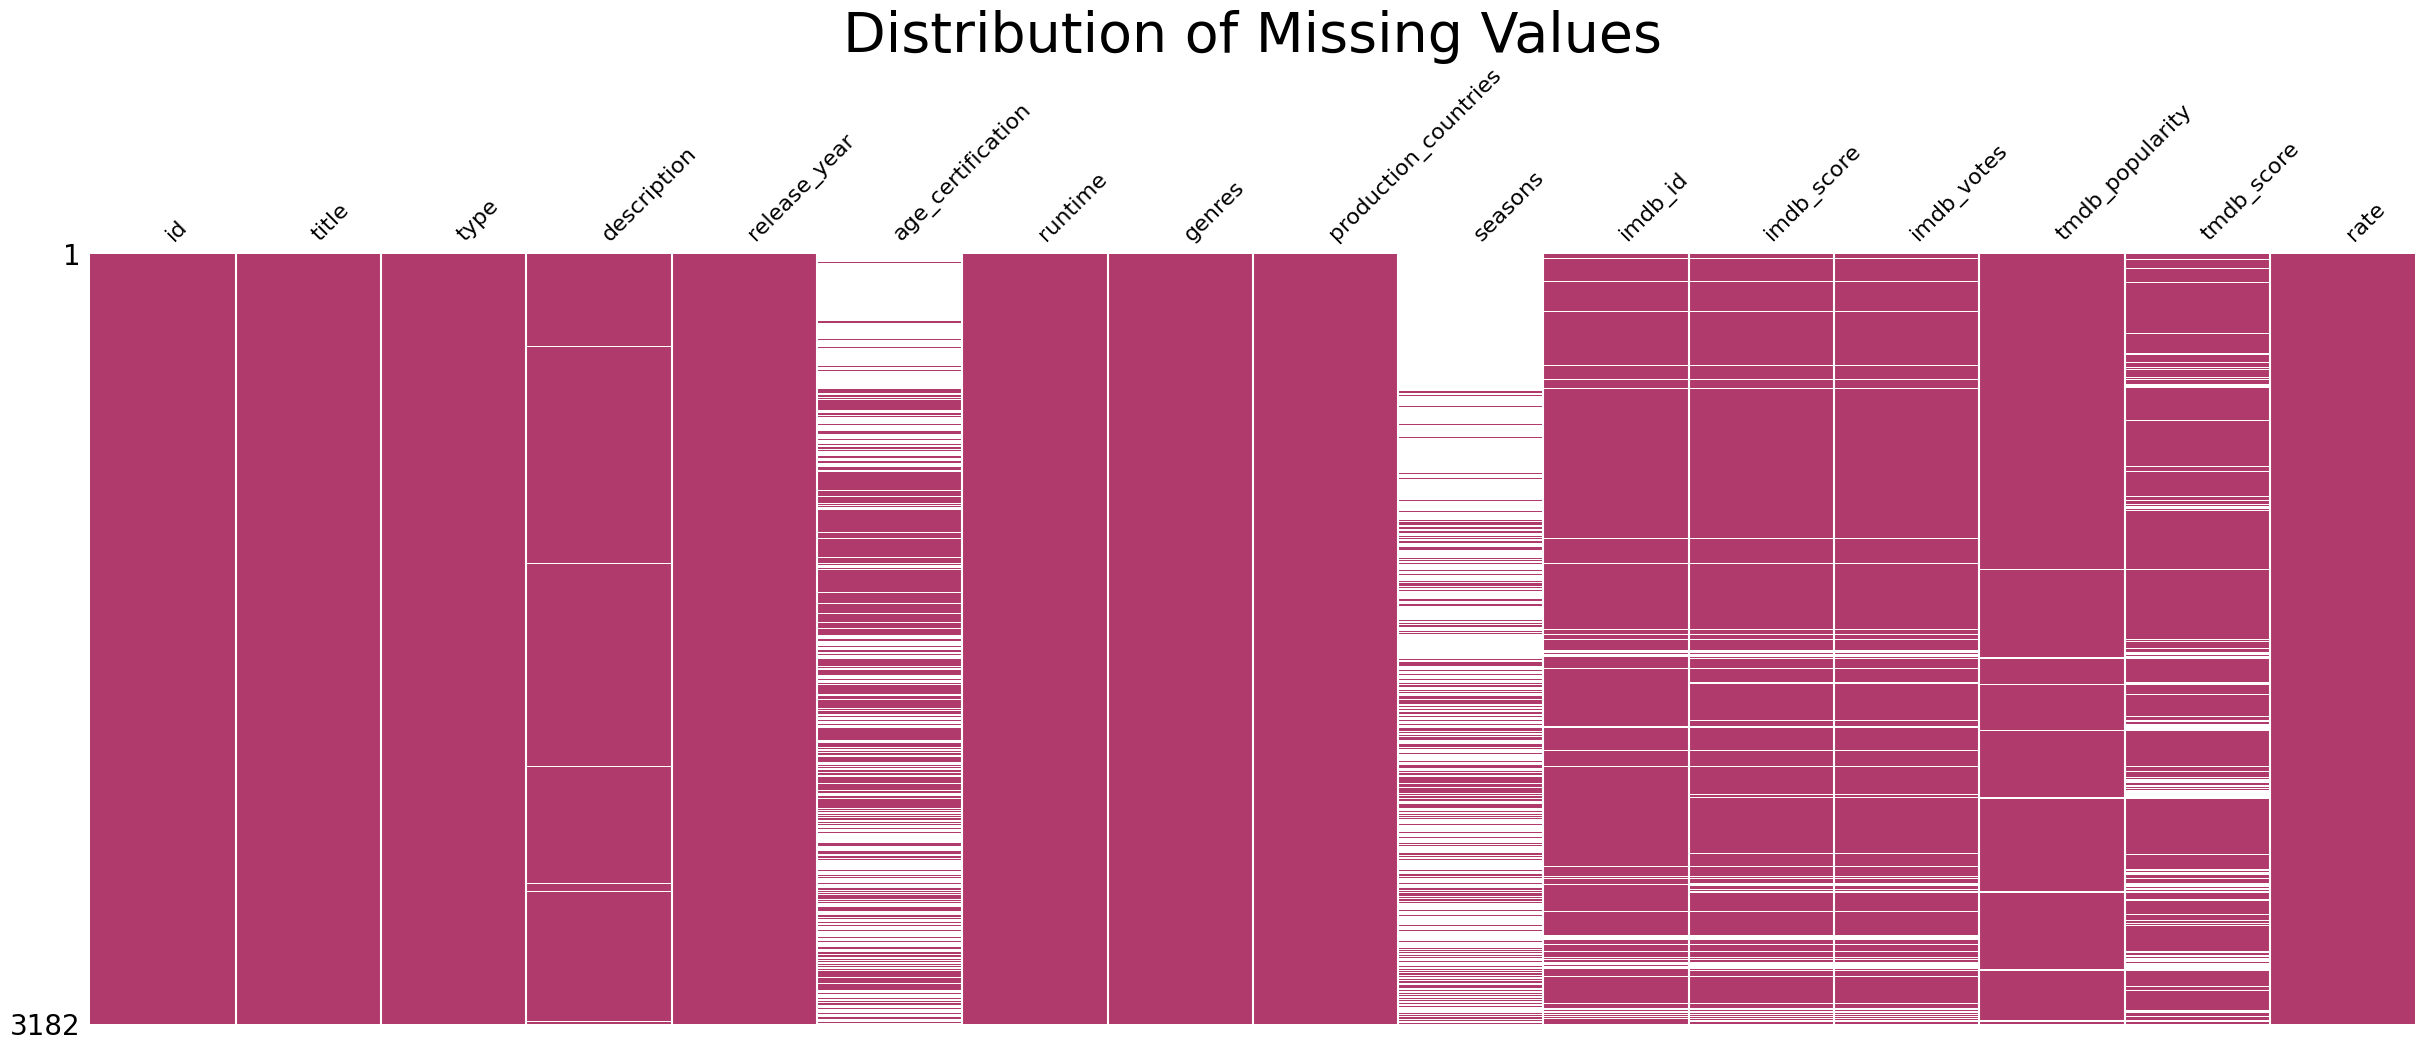

In [ ]:
msno.matrix(df, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.42))
plt.title('Distribution of Missing Values', fontsize=40)

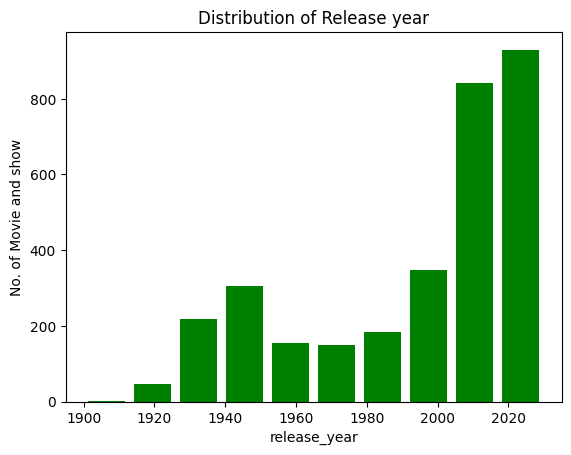

In [ ]:
# RELEASE YEAR histogram
x_values = df['release_year']
plt.xlabel('release_year')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Release year')

range = (1900, 2030) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

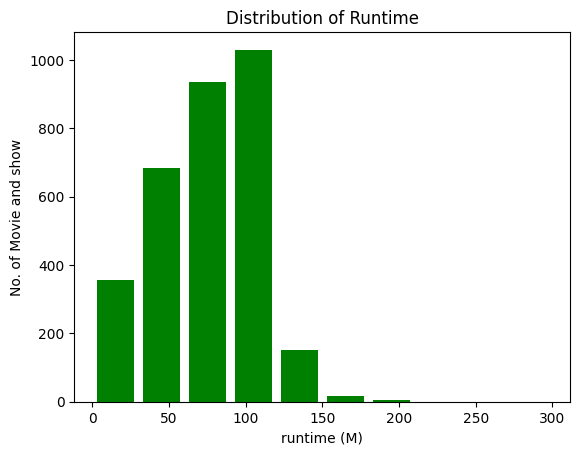

In [ ]:
# RUNTIME histogram
x_values = df['runtime']
plt.xlabel('runtime (M)')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Runtime')

range = (0, 300) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

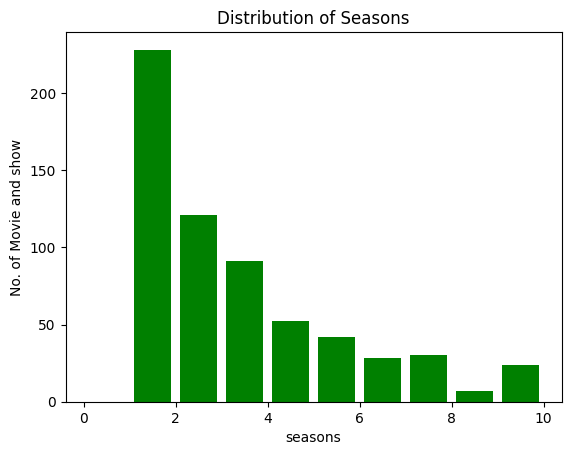

In [ ]:
# SEASONS histogram
x_values = df['seasons']
plt.xlabel('seasons')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Seasons')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

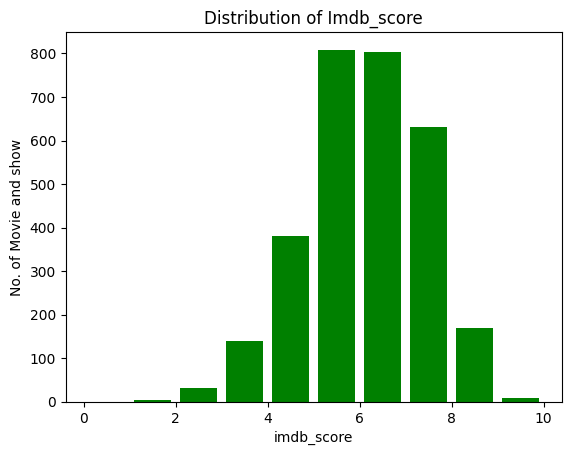

In [ ]:
# IMDB SCORE histogram
x_values = df['imdb_score']
plt.xlabel('imdb_score')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Imdb_score')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

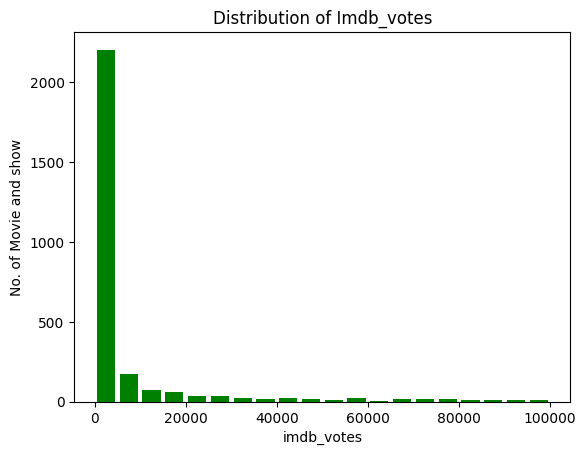

In [ ]:

# IMDB VOTES histogram
x_values = df['imdb_votes']
plt.xlabel('imdb_votes')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of Imdb_votes')

range = (0, 100000) 
bins = 20 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

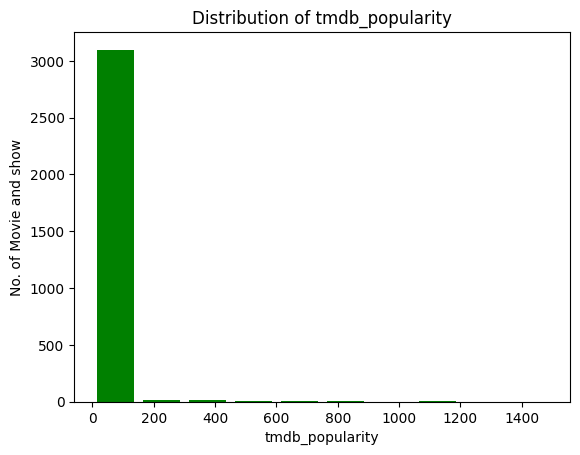

In [ ]:



# tmdb_popularity histogram
x_values = df['tmdb_popularity']
plt.xlabel('tmdb_popularity')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of tmdb_popularity')

range = (0, 1500) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

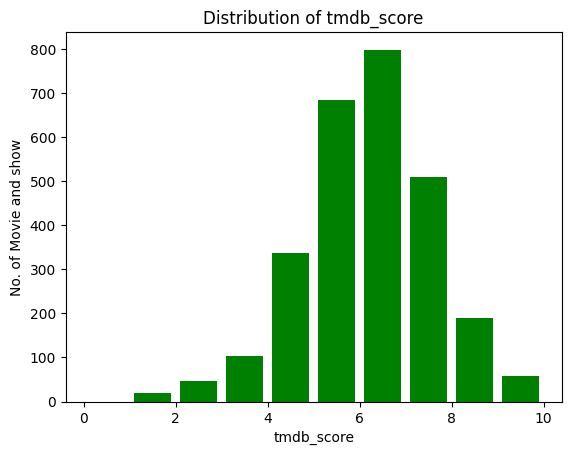

In [ ]:
# tmdb_score histogram
x_values = df['tmdb_score']
plt.xlabel('tmdb_score')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of tmdb_score')

range = (0, 10) 
bins = 10 
 
plt.hist(x_values, bins, range, color='green',histtype='bar',rwidth=0.8)

plt.show()

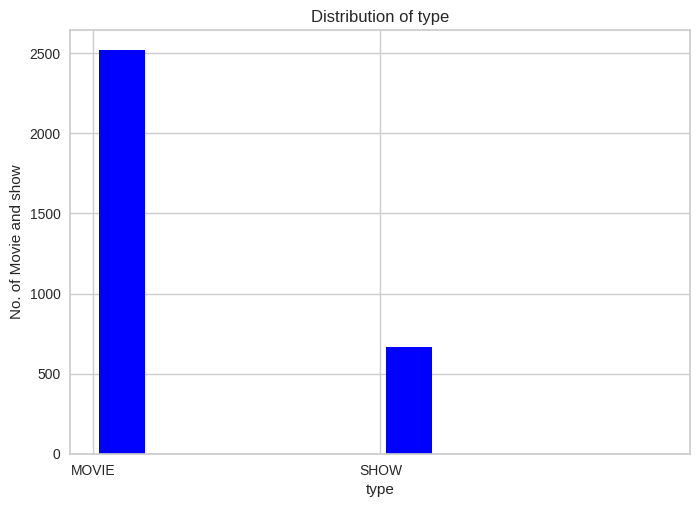

In [ ]:
# biểu đồ phân lớp
x_values = df['type']
plt.xlabel('type')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of type')

range = (0, 2) 
bins = 10 
 
plt.hist(x_values, bins, range, color='blue',histtype='bar',rwidth=0.8)

plt.show()

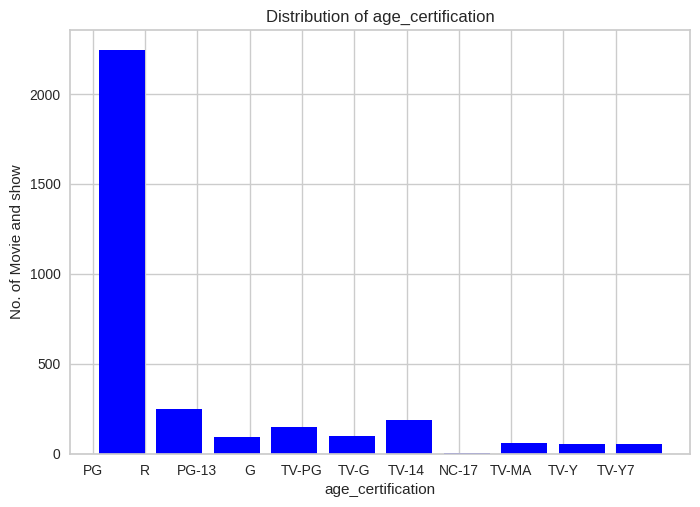

In [ ]:

# biểu đồ phân lớp
x_values = df['age_certification']
plt.xlabel('age_certification')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of age_certification')

range = (0, 11) 
bins = 10 
 
plt.hist(x_values, bins, range, color='blue',histtype='bar',rwidth=0.8)

plt.show()

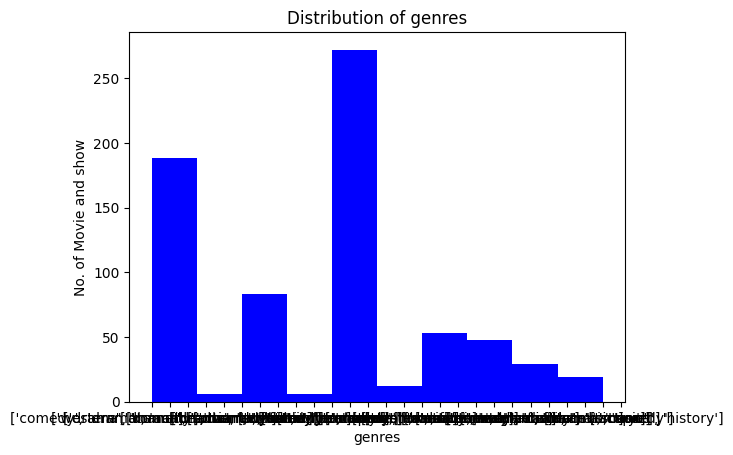

In [ ]:

# biểu đồ phân lớp



x_values = df['genres']
plt.xlabel('genres')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of genres')

range = (0, 25) 
bins = 10 
 
plt.hist(x_values, bins, range, color='blue',histtype='bar',rwidth=1.8)

plt.show()

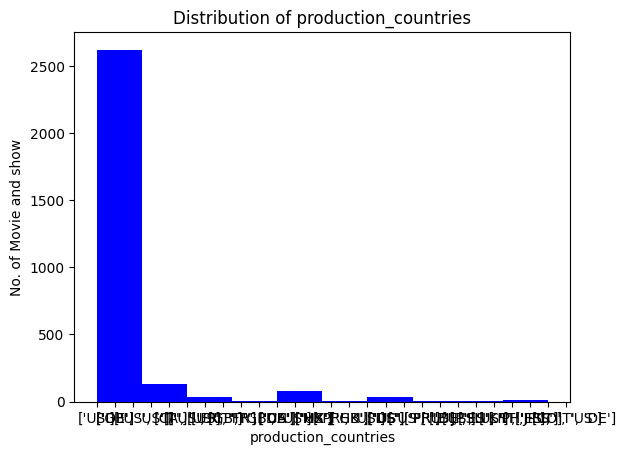

In [ ]:

# biểu đồ phân lớp
x_values = df['production_countries']
plt.xlabel('production_countries')


plt.ylabel('No. of Movie and show')

plt.title('Distribution of production_countries')

range = (0, 25) 
bins = 10 
 
plt.hist(x_values, bins, range, color='blue',histtype='bar',rwidth=1.8)

plt.show()

In [5]:
#Tiền xử lý dữ liệu missing 


datasetA= df
# missing numeric data
imputer = SimpleImputer(missing_values=np.nan,  strategy='mean',fill_value=None, 
verbose=0, copy=True, add_indicator=False)
# release_year missing
testm = datasetA[['release_year']]
dr =  imputer.fit_transform(testm)

datasetA[['release_year']] = dr

# seasons missing

datasetA['seasons'].fillna(0, inplace=True)

# runtime missing

df[['runtime']] = df[['runtime']].replace(0, 60)
# imdb_score missing
testm = datasetA[['imdb_score']]
dr =  imputer.fit_transform(testm)

datasetA[['imdb_score']] = dr
# imdb_votes missing
testm = datasetA[['imdb_votes']]
dr =  imputer.fit_transform(testm)

datasetA[['imdb_votes']] = dr
# tmdb_popularity missing
testm = datasetA[['tmdb_popularity']]
dr =  imputer.fit_transform(testm)

datasetA[['tmdb_popularity']] = dr
# tmdb_score missing
testm = datasetA[['tmdb_score']]
dr =  imputer.fit_transform(testm)

datasetA[['tmdb_score']] = dr

# fix missing data string
imputer = SimpleImputer(missing_values=np.nan,  strategy='most_frequent',fill_value=None, 
verbose=0, copy=True, add_indicator=False)
# title description
testm = datasetA[['title']]
dr =  imputer.fit_transform(testm)

datasetA[['title']] = dr

tfidf = TfidfVectorizer(stop_words='english')
dr =  tfidf.fit_transform(datasetA['title'])

datasetA[['title']] = dr
#string data

# type missing
testm = datasetA[['type']]
dr =  imputer.fit_transform(testm)

datasetA[['type']] = dr
# missing age certification
testm = datasetA[['age_certification']]
dr =  imputer.fit_transform(testm)

datasetA[['age_certification']] = dr
# missing description
testm = datasetA[['description']]
dr =  imputer.fit_transform(testm)

datasetA[['description']] = dr

tfidf = TfidfVectorizer(stop_words='english')
dr =  tfidf.fit_transform(datasetA['description'])

datasetA[['description']] = dr

#missing genres
df[['genres']] = df[['genres']].replace(['[]'], "['drama']")

#missing production_countries
df[['production_countries']] = df[['production_countries']].replace(['[]'], "['US']")

datasetA.tail(15)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will alw

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rate
3167,ts369971,"(0, 3490)\t0.7779118757816977\n (0, 1230)\t...",SHOW,"(0, 14176)\t0.24354445395400634\n (0, 5761)...",2022.0,R,1,['family'],['US'],1.0,tt22208486,6.06716,25252.290377,13.44353,6.084723,normal
3168,tm875741,"(0, 1097)\t0.6729348440655765\n (0, 1239)\t...",MOVIE,"(0, 10903)\t0.4235367506569644\n (0, 6450)\...",2021.0,R,95,"['crime', 'drama', 'romance', 'thriller']",['US'],0.0,tt11638942,5.20000,579.000000,13.44353,6.084723,normal
3169,ts373298,"(0, 2354)\t1.0",SHOW,"(0, 5245)\t0.28613677507232044\n (0, 10194)...",2022.0,R,88,['drama'],['US'],1.0,NaN,6.06716,25252.290377,13.44353,6.084723,normal
3170,ts324789,"(0, 2169)\t0.7456443897775673\n (0, 2176)\t...",SHOW,"(0, 7008)\t0.3259923473732167\n (0, 3413)\t...",2021.0,TV-G,24,['drama'],['US'],3.0,tt16450828,6.06716,25252.290377,13.44353,6.084723,normal
3171,tm1244765,"(0, 2144)\t0.5226890497690938\n (0, 2522)\t...",MOVIE,"(0, 10829)\t0.25353653499669665\n (0, 13842...",2021.0,R,44,['documentation'],['US'],0.0,tt21342466,6.06716,25252.290377,13.44353,6.084723,normal
3172,ts291097,"(0, 450)\t0.5\n (0, 2913)\t0.5\n (0, 924)\...",SHOW,"(0, 10829)\t0.25353653499669665\n (0, 13842...",2021.0,TV-MA,40,['documentation'],['US'],1.0,tt14315936,4.30000,18.000000,13.44353,6.084723,normal
3173,ts313367,"(0, 2258)\t0.7731337351416181\n (0, 3441)\t...",SHOW,"(0, 3302)\t0.2903732312120889\n (0, 1233)\t...",2023.0,TV-MA,50,"['drama', 'fantasy', 'horror', 'scifi']",['US'],1.0,tt15487922,6.20000,4183.000000,267.80000,8.206000,normal
3174,ts378183,"(0, 2949)\t0.7898668156350132\n (0, 2731)\t...",SHOW,"(0, 11675)\t0.34488108821400204\n (0, 536)\...",2023.0,TV-MA,60,['drama'],['US'],1.0,tt21057450,6.06716,25252.290377,33.04000,9.000000,normal
3175,tm1238886,"(0, 3101)\t0.6061774126293271\n (0, 2106)\t...",MOVIE,"(0, 4927)\t0.2728914772956087\n (0, 7234)\t...",2023.0,R,140,"['action', 'fantasy', 'comedy', 'drama', 'roma...",['US'],0.0,tt15613268,5.60000,10150.000000,354.78400,7.905000,normal
3176,tm1285862,"(0, 2034)\t1.0",MOVIE,"(0, 16154)\t0.3522408445615705\n (0, 634)\t...",2023.0,R,100,"['comedy', 'romance']","['US', 'MX']",0.0,tt14874302,5.50000,864.000000,21.74600,5.729000,normal


In [6]:
#loại bỏ các cột không cần thiết id movie , id imdb
datasetA = datasetA.drop(columns=['id', 'imdb_id'])
# chuyển dữ liệu dạng số học

scaler = StandardScaler();
datasetA[['release_year','runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']] = scaler.fit_transform(datasetA[['release_year','runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']])

# chuyển dữ liệu dạng string phân nhãn
# encode_cols = ['type', 'age_certification', 'genres', 'production_countries']

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['type']])
datasetA['type'] = genre_labels

# genre_labels = gle.fit_transform(datasetA[['title']])
# datasetA['title'] = genre_labels

# genre_labels = gle.fit_transform(datasetA[['description']])
# datasetA['description'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['age_certification']])
datasetA['age_certification'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['genres']])
datasetA['genres'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['production_countries']])
datasetA['production_countries'] = genre_labels

gle = LabelEncoder()
genre_labels = gle.fit_transform(datasetA[['rate']])
datasetA['rate'] = genre_labels

datasetA


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rate
0,"(0, 416)\t0.7467898333210587\n (0, 3043)\t0...",0,"(0, 10288)\t0.3645517392041867\n (0, 7114)\...",-1.409326,2,1.131681,593,150,-0.286584,1.890066,2.057943e+00,0.111814,1.696055,0
1,"(0, 1228)\t0.7672631741237649\n (0, 1292)\t...",0,"(0, 4954)\t0.17739810408404716\n (0, 8021)\...",-1.735754,4,0.552565,517,150,-0.286584,1.403946,3.610444e-01,0.029491,1.002400,0
2,"(0, 2602)\t0.7504603002858251\n (0, 2526)\t...",0,"(0, 8067)\t0.09191105921792876\n (0, 5271)\...",-1.474611,4,1.871663,986,150,-0.286584,1.403946,7.178964e-02,-0.023395,0.977866,0
3,"(0, 1270)\t1.0",0,"(0, 826)\t0.23554914920525122\n (0, 12279)\...",-2.192754,4,0.134314,191,150,-0.286584,1.647006,6.983501e-01,-0.025278,1.430637,0
4,"(0, 1723)\t1.0",0,"(0, 13714)\t0.19061992772896036\n (0, 12385...",-2.355968,4,-0.219590,202,150,-0.286584,1.809046,1.061141e+00,0.031868,1.581561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,"(0, 3168)\t1.0",1,"(0, 3106)\t0.28863037265263813\n (0, 253)\t...",0.973602,7,-0.863053,375,150,0.058706,1.322927,-2.596142e-01,-0.204046,-3.036858,1
3178,"(0, 1129)\t0.7250345949669792\n (0, 3214)\t...",1,"(0, 3172)\t0.2609721522935289\n (0, 7638)\t...",0.973602,5,-1.635208,462,150,0.058706,0.674767,-2.602952e-01,-0.132553,0.000000,1
3179,"(0, 1850)\t1.0",1,"(0, 11788)\t0.19046044529541606\n (0, 10081...",0.973602,4,-1.056092,741,150,0.058706,-0.297473,-2.597689e-01,-0.239715,-3.036858,1
3180,"(0, 2796)\t0.6020417448488262\n (0, 3458)\t...",0,"(0, 10326)\t0.3196107172850437\n (0, 3551)\...",0.973602,3,-0.991745,392,150,-0.286584,0.000000,-3.753666e-17,-0.265003,0.000000,1


In [8]:
datasetB = datasetA.drop(columns=['title', 'description'])

In [16]:
# phân chia tập train test
xlabel = ['type', 'age_certification', 'genres', 'production_countries','release_year','runtime', 'seasons','imdb_score', 'imdb_votes', 'tmdb_popularity','tmdb_score']
ylabel =['rate']

xtrain = datasetB[xlabel]
ytrain = datasetB[ylabel]

# scaler = StandardScaler()

# xtrain = scaler.fit_transform(xtrain)

ytrain= np.ravel(ytrain,order='C')

ytrain = np.asarray( ytrain, dtype="|S6")

x_train, x_test, y_train, y_test = train_test_split(xtrain,ytrain, test_size = 0.3, random_state = 1)
print(xtrain)
print(ytrain)

      type  age_certification  genres  production_countries  release_year  \
0        0                  2     593                   150     -1.409326   
1        0                  4     517                   150     -1.735754   
2        0                  4     986                   150     -1.474611   
3        0                  4     191                   150     -2.192754   
4        0                  4     202                   150     -2.355968   
...    ...                ...     ...                   ...           ...   
3177     1                  7     375                   150      0.973602   
3178     1                  5     462                   150      0.973602   
3179     1                  4     741                   150      0.973602   
3180     0                  3     392                   150      0.973602   
3181     0                  4     392                   150      0.973602   

       runtime   seasons  imdb_score    imdb_votes  tmdb_popularity  \
0   

In [ ]:
#Neural networking
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,50), random_state=1)

# sfm = SelectFromModel(clf, threshold=(.8 * (1 - .8))) # sử dụng feature select SelectFromModel nếu cần



clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accMLP =  accuracy_score(y_test, y_pred)
preMLP= metrics.precision_score(y_test, y_pred,average='macro')

recallMLP= metrics.recall_score(y_test, y_pred,average='macro')
f1MLP = metrics.f1_score(y_test, y_pred,average='macro') 


                          
print("Accuracy = " ,accMLP)
print("Precision Macro = " ,preMLP)
print("Recall Macro = " ,recallMLP)
print("F1 Macro = " ,f1MLP)



Accuracy =  0.9026178010471204
Precision Macro =  0.7406464300121016
Recall Macro =  0.6674561403508772
F1 Macro =  0.6948787450915724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 37  63]
 [ 30 825]]


<Axes: >

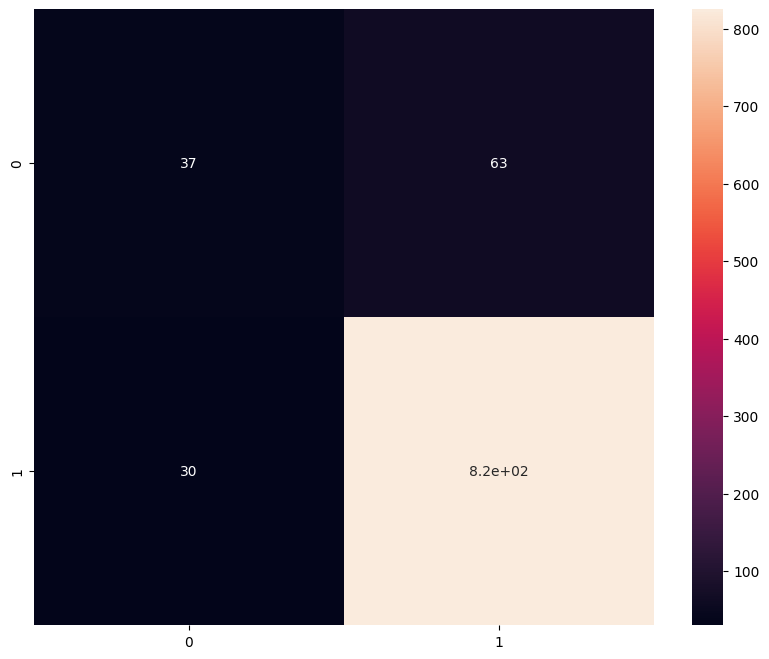

In [ ]:
#cofusion matrix heatmap

matrix = confusion_matrix(y_test, y_pred)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_predKnnBest = knn.predict(x_test)
    

accKnn = accuracy_score(y_test, y_predKnnBest)
preKnn = metrics.precision_score(y_test, y_predKnnBest,average='macro')
recallKnn= metrics.recall_score(y_test, y_predKnnBest,average='macro')
f1Knn = metrics.f1_score(y_test, y_predKnnBest,average='macro') 


print("Accuracy = " ,accKnn)
print("Precision Macro = " ,preKnn)
print("Recall Macro = " ,recallKnn)
print("F1 Macro = " ,f1Knn)

Accuracy =  0.9109947643979057
Precision Macro =  0.8224216130940643
Recall Macro =  0.6147368421052631
F1 Macro =  0.6565344142573654


[[ 24  76]
 [  9 846]]


<Axes: >

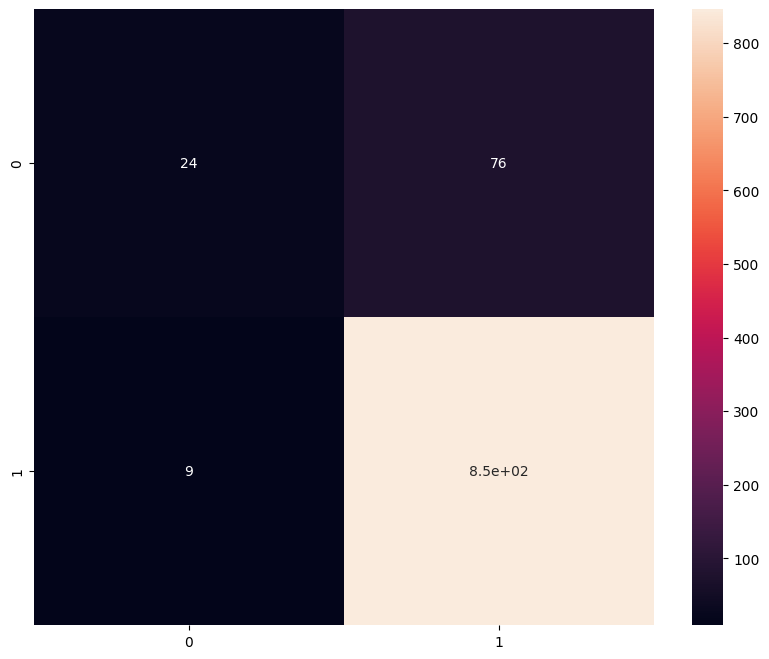

In [ ]:
matrix = confusion_matrix(y_test, y_predKnnBest)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [ ]:
# svm linear
svm = svm.SVC(kernel='linear') # Linear Kernel

svm.fit(x_train,y_train)

y_predSVML = svm.predict(x_test)

accSvmL =  accuracy_score(y_test, y_predSVML)
preSvmL= metrics.precision_score(y_test, y_predSVML,average='macro')

recallSvmL= metrics.recall_score(y_test, y_predSVML,average='macro')
f1SvmL = metrics.f1_score(y_test, y_predSVML,average='macro') 



print("Accuracy = " ,accSvmL)
print("Precision Macro = " ,preSvmL)
print("Recall Macro = " ,recallSvmL)
print("F1 Macro = " ,f1SvmL)

Accuracy =  0.9486910994764398
Precision Macro =  0.8989772727272727
Recall Macro =  0.8079824561403508
F1 Macro =  0.845878962536023


[[ 63  37]
 [ 12 843]]


<Axes: >

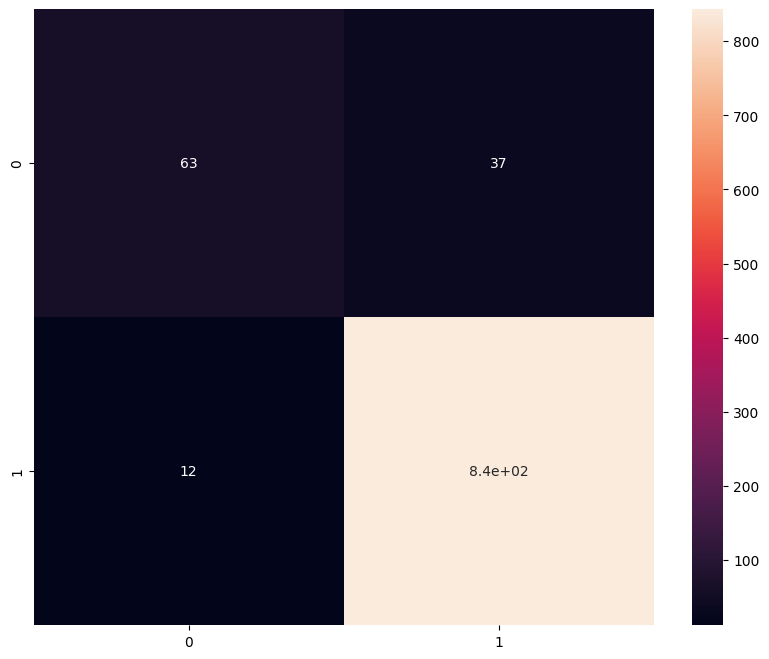

In [ ]:
matrix = confusion_matrix(y_test, y_predSVML)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [ ]:
# svm rbf
classifier = SVC(kernel = 'rbf') # rbf Kernel

classifier.fit(x_train,y_train)

y_predSVMR = classifier.predict(x_test)

accSvmR =  accuracy_score(y_test, y_predSVMR)
preSvmR= metrics.precision_score(y_test, y_predSVMR,average='macro')

recallSvmR= metrics.recall_score(y_test, y_predSVMR,average='macro')
f1SvmR = metrics.f1_score(y_test, y_predSVMR,average='macro') 


print("Accuracy = " ,accSvmR)
print("Precision Macro = " ,preSvmR)
print("Recall Macro = " ,recallSvmR)
print("F1 Macro = " ,f1SvmR)

Accuracy =  0.8952879581151832
Precision Macro =  0.4476439790575916
Recall Macro =  0.5
F1 Macro =  0.47237569060773477


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 100]
 [  0 855]]


<Axes: >

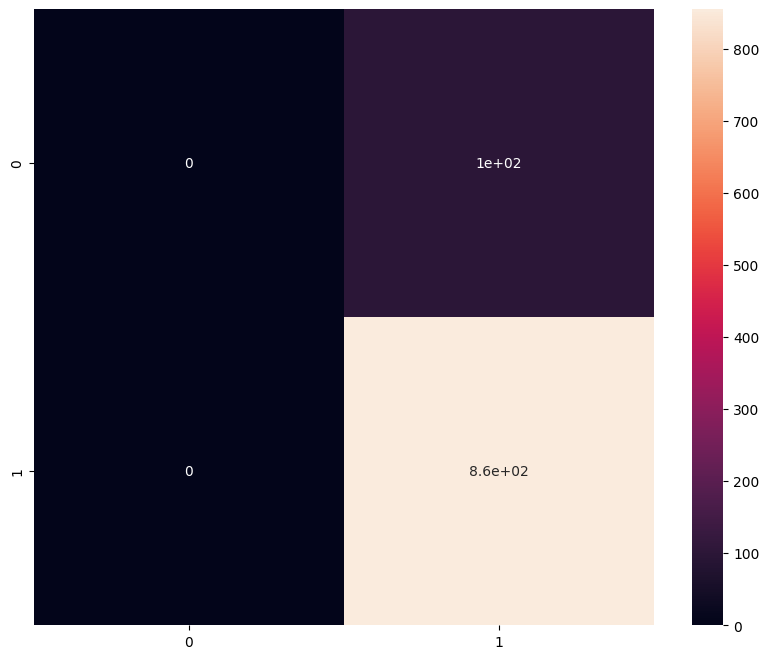

In [ ]:
matrix = confusion_matrix(y_test, y_predSVMR)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [ ]:
# svm poly
svm = SVC(kernel="poly")# poly Kernel

svm.fit(x_train,y_train)

y_predSVMP = svm.predict(x_test)

accSvmP =  accuracy_score(y_test, y_predSVMP)
preSvmP= metrics.precision_score(y_test, y_predSVMP,average='macro')

recallSvmP= metrics.recall_score(y_test, y_predSVMP,average='macro')
f1SvmP = metrics.f1_score(y_test, y_predSVMP,average='macro') 



print("Accuracy = " ,accSvmP)
print("Precision Macro = " ,preSvmP)
print("Recall Macro = " ,recallSvmP)
print("F1 Macro = " ,f1SvmP)

Accuracy =  0.8952879581151832
Precision Macro =  0.4476439790575916
Recall Macro =  0.5
F1 Macro =  0.47237569060773477


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0 100]
 [  0 855]]


<Axes: >

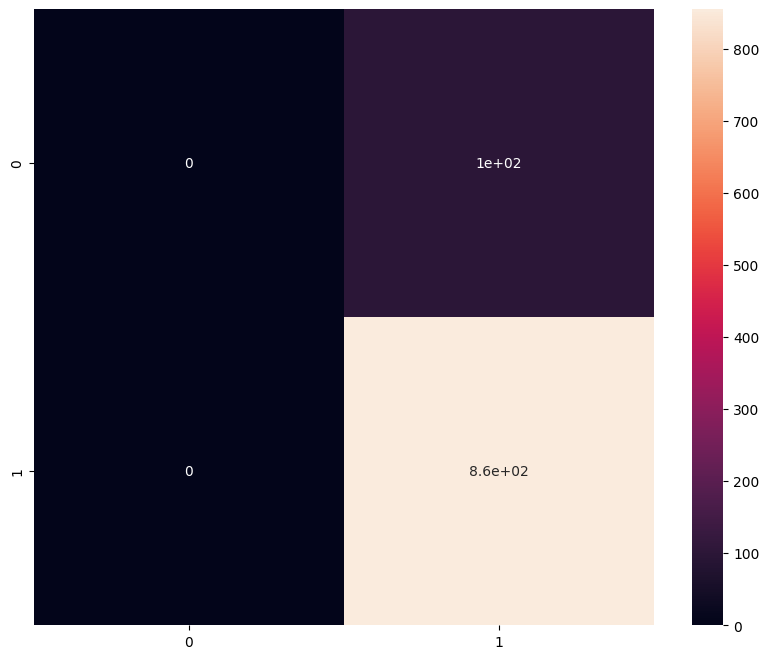

In [ ]:
matrix = confusion_matrix(y_test, y_predSVMP)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

Accuracy =  0.9916230366492147
Precision Macro =  0.9953650057937428
Recall Macro =  0.96
F1 Macro =  0.976838377958867
[[ 92   8]
 [  0 855]]


<Axes: >

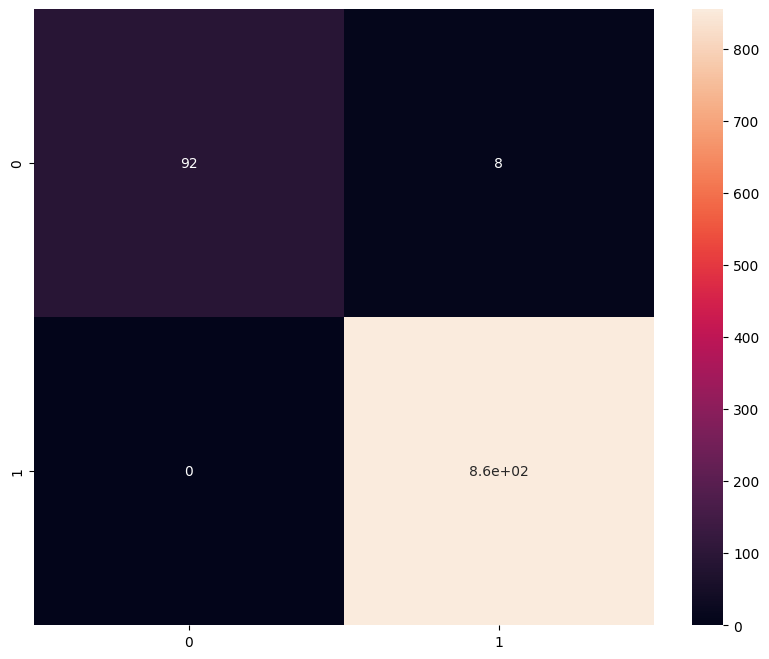

In [17]:
# RFS
RFS = RandomForestClassifier(n_estimators=100)
RFS.fit(x_train, y_train) 
y_pred_rfs = RFS.predict(x_test)
accuracy_rfs = accuracy_score(y_test, y_pred_rfs)
precision_rfs = metrics.precision_score(y_test, y_pred_rfs, average = 'macro')
recall_rfs = metrics.recall_score(y_test, y_pred_rfs, average = 'macro')
f1_rfs = metrics.f1_score(y_test, y_pred_rfs, average = 'macro')

print("Accuracy = " ,accuracy_rfs)
print("Precision Macro = " ,precision_rfs)
print("Recall Macro = " ,recall_rfs)
print("F1 Macro = " ,f1_rfs)


#cofusion matrix heatmap

matrix = confusion_matrix(y_test, y_pred_rfs)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

Accuracy =  0.680628272251309
Precision Macro =  0.6219229870176575
Recall Macro =  0.8172222222222223
F1 Macro =  0.588432447249693
[[ 99   1]
 [304 551]]


<Axes: >

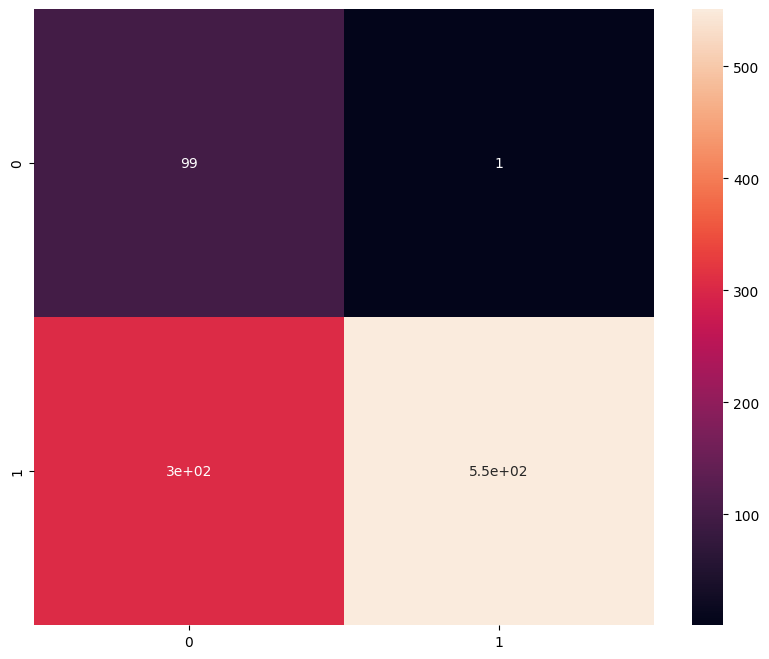

In [12]:
# NB 
NB = GaussianNB()
NB.fit(x_train, y_train) 
y_pred_nb = NB.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = metrics.precision_score(y_test, y_pred_nb, average = 'macro')
recall_nb = metrics.recall_score(y_test, y_pred_nb, average = 'macro')
f1_nb = metrics.f1_score(y_test, y_pred_nb,  average = 'macro')


print("Accuracy = " ,accuracy_nb)
print("Precision Macro = " ,precision_nb)
print("Recall Macro = " ,recall_nb)
print("F1 Macro = " ,f1_nb)

#cofusion matrix heatmap

matrix = confusion_matrix(y_test, y_pred_nb)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

Accuracy =  0.9947643979057592
Precision Macro =  0.9881466534503918
Recall Macro =  0.9838304093567252
F1 Macro =  0.9859760520897884
[[ 97   3]
 [  2 853]]


<Axes: >

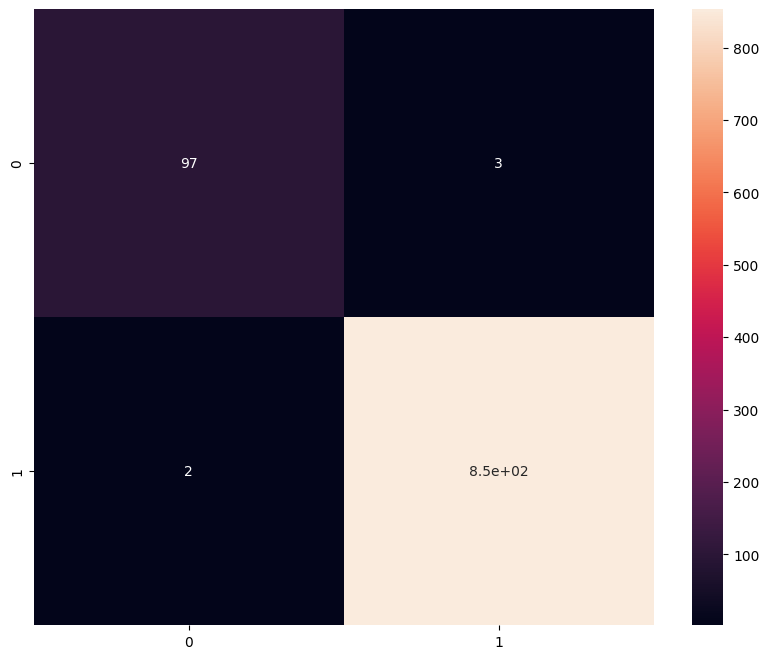

In [11]:
DTC = DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTC.fit(x_train, y_train)  
y_pred_dtc = DTC.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = metrics.precision_score(y_test, y_pred_dtc, average = 'macro')
recall_dtc = metrics.recall_score(y_test, y_pred_dtc, average = 'macro')
f1_dtc = metrics.f1_score(y_test, y_pred_dtc,  average = 'macro')

print("Accuracy = " ,accuracy_dtc)
print("Precision Macro = " ,precision_dtc)
print("Recall Macro = " ,recall_dtc)
print("F1 Macro = " ,f1_dtc)

#cofusion matrix heatmap

matrix = confusion_matrix(y_test, y_pred_dtc)
print(matrix)
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)